Regression DNN

In [ ]:
!pip install -q -U keras-tuner


In [ ]:
from pandas import read_csv

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.layers import Dropout 
from keras import regularizers 

import keras_tuner

from tensorflow import keras

In [ ]:
# load data and arrange into Pandas dataframe
df = read_csv("dataset_prepro.csv")

In [ ]:
print(df.head())


       count  density  width  white  light  medium  dark  extra_dark  black  \
0  19.683333      145  170.0      0      0       0     1           0      0   
1  19.683333      155   91.0      0      0       0     0           0      1   
2  19.683333      155   95.0      0      0       0     0           0      1   
3  19.683333      155  169.0      0      0       0     0           0      1   
4  19.683333      155  183.0      0      0       0     0           0      1   

   diameter  gauge  needles  feeders  rpm  shrinkage_length  shrinkage_width  \
0        34     24     2568      102   22               6.5              1.0   
1        34     28     2976      102   22               2.0              2.0   
2        30     28     2640       88   24               2.0              2.0   
3        30     28     2640       88   24               2.0              2.0   
4        34     28     2976      102   22               2.0              2.0   

   stitch_length  
0       0.261293  
1     

In [ ]:
print(df.describe())

             count      density        width        white        light  \
count  7023.000000  7023.000000  7023.000000  7023.000000  7023.000000   
mean     22.100323   157.463335   151.158123     0.137263     0.258152   
std       3.402013    14.290564    49.446585     0.344150     0.437649   
min      14.762500   120.000000    65.000000     0.000000     0.000000   
25%      19.683333   145.000000    96.000000     0.000000     0.000000   
50%      22.711538   160.000000   170.000000     0.000000     0.000000   
75%      22.711538   165.000000   185.000000     0.000000     1.000000   
max      36.906250   240.000000  1709.000000     1.000000     1.000000   

            medium         dark  extra_dark        black     diameter  \
count  7023.000000  7023.000000      7023.0  7023.000000  7023.000000   
mean      0.190659     0.135270         0.0     0.241492    32.755233   
std       0.392849     0.342036         0.0     0.428018     1.775905   
min       0.000000     0.000000         0

In [ ]:
#Split into features and target (Price)
X = df.drop('stitch_length', axis = 1)
y = df['stitch_length']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
#Scale dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=16, activation='tanh'))
model.add(Dense(80, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [ ]:
import tensorflow as tf
tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_absolute_percentage_error'])

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = model.fit(X_train_scaled, y_train, batch_size = 128, 
                    epochs = 100, validation_split=0.2, 
                    callbacks =[earlystopping])

Epoch 1/100
36/36 [==============================] - 1s 8ms/step - loss: 0.0150 - mean_absolute_percentage_error: 29.4362 - val_loss: 0.0012 - val_mean_absolute_percentage_error: 9.4006
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 8.0748e-04 - mean_absolute_percentage_error: 7.6559 - val_loss: 5.9215e-04 - val_mean_absolute_percentage_error: 6.4614
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 4.4670e-04 - mean_absolute_percentage_error: 5.5856 - val_loss: 3.9647e-04 - val_mean_absolute_percentage_error: 5.2148
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 3.1245e-04 - mean_absolute_percentage_error: 4.6089 - val_loss: 3.0088e-04 - val_mean_absolute_percentage_error: 4.5295
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 2.4192e-04 - mean_absolute_percentage_error: 4.0594 - val_loss: 2.6107e-04 - val_mean_absolute_percentage_error: 4.2562
Epoch 6/100
36/36 [=======================

In [ ]:
#fitting Model
#history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100, callbacks =[earlystopping])

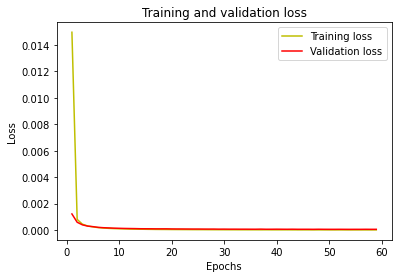

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Predict on test data
predictions = model.predict(X_test_scaled[:10])
y_real=y_test[:10]
print("Predicted values are: ", predictions)
print("Real values are: ", y_real)


Predicted values are:  [[0.2649334 ]
 [0.2542006 ]
 [0.27634105]
 [0.3046462 ]
 [0.27323753]
 [0.2762041 ]
 [0.29088444]
 [0.2850004 ]
 [0.25444743]
 [0.3036595 ]]
Real values are:  6754    0.270833
1588    0.255040
6667    0.276016
97      0.305101
2084    0.270325
2927    0.285145
5052    0.294003
3987    0.288949
1952    0.251984
689     0.306042
Name: stitch_length, dtype: float64


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_real,predictions)
r2

0.9017645748711131

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 5.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=c2bb1d3346346f38c88b3e02d08d440d3da9bcd67eb9e0fcb8aed2412cf18c89
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
feature_names = ['count', 'density', 'width','white', 'light', 'medium', 'dark', 'extra_dark', 'black', 'diameter', 'gauge', 'needles', 'feeders', 'rpm', 'shrinkage_length', 'shrinkage_width','stitch_length']

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_test_scaled, feature_names=feature_names, verbose=True, mode='regression')

In [ ]:
import pandas as pd
feature_names = ['count', 'density', 'width','white', 'light', 'medium', 'dark', 'extra_dark', 'black', 'diameter', 'gauge', 'needles', 'feeders', 'rpm', 'shrinkage_length', 'shrinkage_width']


In [ ]:
#import numpy as np
#a=X_test_scaled[:4]
#a


array([[-0.71511492, -0.52785533, -1.59188835, -0.399432  , -0.59311092,
         2.08455879, -0.40301984,  0.        , -0.55966998, -0.40834319,
        -0.72867652, -0.84618162,  0.57333369, -0.95476713,  1.44218093,
         1.74860666],
       [-1.07486317, -0.87760073, -1.33693141, -0.399432  , -0.59311092,
        -0.47971782, -0.40301984,  0.        ,  1.78676728,  0.71180918,
         1.94519982,  1.98763673,  0.57333369,  0.56302623, -0.03706001,
        -0.74388876],
       [ 0.17041924,  0.17163547,  0.44776714, -0.399432  ,  1.68602528,
        -0.47971782, -0.40301984,  0.        , -0.55966998, -1.52849556,
         0.60826165, -0.55099221,  0.30836259,  1.3219229 ,  0.70256046,
         1.74860666],
       [ 0.72387809,  0.17163547,  0.79543569, -0.399432  , -0.59311092,
        -0.47971782, -0.40301984,  0.        ,  1.78676728,  0.71180918,
        -0.72867652, -0.01965127,  0.57333369,  0.56302623, -0.03706001,
        -2.40555237]])

In [ ]:
df=pd.DataFrame(a)
a=df.iloc[1]

Intercept 0.2714522636220815
Prediction_local [0.26146594]
Right: 0.2542006


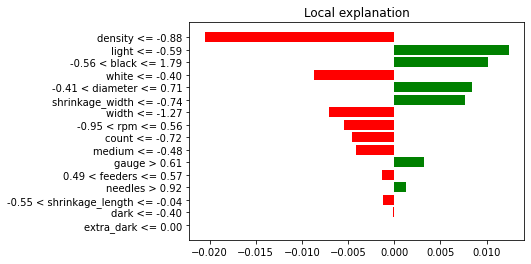

In [ ]:
explain_data_point = explainer.explain_instance(a,model.predict, num_features=16)
explain_data_point.as_pyplot_figure();